## ✅ Setup

### ✅ Import Libs

In [1]:
import pandas as pd 
import numpy as np 


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from dython.nominal import associations
from plotly.subplots import make_subplots
from dython.nominal import associations


# machine learning 
from sklearn.preprocessing import LabelEncoder , Binarizer , RobustScaler , StandardScaler , OneHotEncoder , MinMaxScaler
from sklearn.metrics import (accuracy_score, confusion_matrix, f1_score , ConfusionMatrixDisplay,
                            recall_score , roc_auc_score , precision_score) 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC , LinearSVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier , ExtraTreeClassifier 
from sklearn.model_selection import train_test_split ,cross_validate ,GridSearchCV

# over Sampling 
from imblearn.over_sampling import SMOTE


# outliers detection 
from datasist.structdata import detect_outliers 


# warnings handling
import warnings
warnings.simplefilter("ignore")

## ✅ Data Exploration 

### ✅ Load Data 

In [2]:
df = pd.read_csv("diabetes - diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### ✅ Check Data Information 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### ✅ Check Duplicates

In [5]:
df.duplicated().sum()

np.int64(0)

### ✅ Summary Stats

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


📊 **Pregnancies**  
- **Mean (3.85) vs Std (3.37)** → Std is almost as large as mean → data is quite spread out; not tightly clustered.  
- **Max (17) vs Q3 (6)** → Huge gap → strong right-skew + likely outliers (e.g., 17 pregnancies is extreme).

---

📊 **Glucose**  
- **Mean (120.9) vs Std (32.0)** → Moderate spread; std ~26% of mean → reasonable variation.  
- **Max (199) vs Q3 (140.25)** → Gap of ~59 → suggests upper outliers (common in diabetic populations).

---

📊 **BloodPressure**  
- **Mean (69.1) vs Std (19.4)** → Fairly wide spread; std ~28% of mean.  
- **Min = 0?** → Physiologically impossible → likely missing values mis-coded as 0.  
- **Max (122) vs Q3 (80)** → Gap of 42 → possible outliers on high end.

---

📊 **SkinThickness**  
- **Mean (20.5) vs Std (16.0)** → Very high relative spread → data is all over the place.  
- **Min = 0 & Q1 = 0** → Many zeros → probably missing data.  
- **Max (99) vs Q3 (32)** → Huge gap → extreme outliers or measurement errors.

---

📊 **Insulin**  
- **Mean (79.8) vs Std (115.2)** → Std > Mean → extremely skewed, mostly low values with rare high spikes.  
- **Min = 0 & Q1 = 0** → Majority of values are 0 → likely missing or unmeasured.  
- **Max (846) vs Q3 (127.25)** → Massive gap → severe right-skew + extreme outliers.

---

📊 **BMI**  
- **Mean (32.0) vs Std (7.9)** → Std ~25% of mean → moderate spread, typical for BMI.  
- **Min = 0?** → Invalid → likely missing data.  
- **Max (67.1) vs Q3 (36.6)** → Gap of ~30 → suggests upper outliers (morbid obesity cases).

---

📊 **DiabetesPedigreeFunction**  
- **Mean (0.47) vs Std (0.33)** → Std ~70% of mean → relatively high variability for a score.  
- **Max (2.42) vs Q3 (0.63)** → Large gap → right-skewed with high-end outliers (strong genetic risk).

---

📊 **Age**  
- **Mean (33.2) vs Std (11.8)** → Std ~35% of mean → decent spread across adult ages.  
- **Max (81) vs Q3 (41)** → Gap of 40 → older patients are outliers relative to the 75th percentile.

---

📊 **Outcome**  
- **Mean (0.35) → 35% have diabetes**.  
- **Std (0.48)** → High for binary → balanced-ish but slightly skewed toward non-diabetic (0).  
- **Q3 = 1, Q1 = 0** → Confirms binary nature. No outliers — it’s 0/1 by design.

---


### ✅ Check Outliers Using Box 

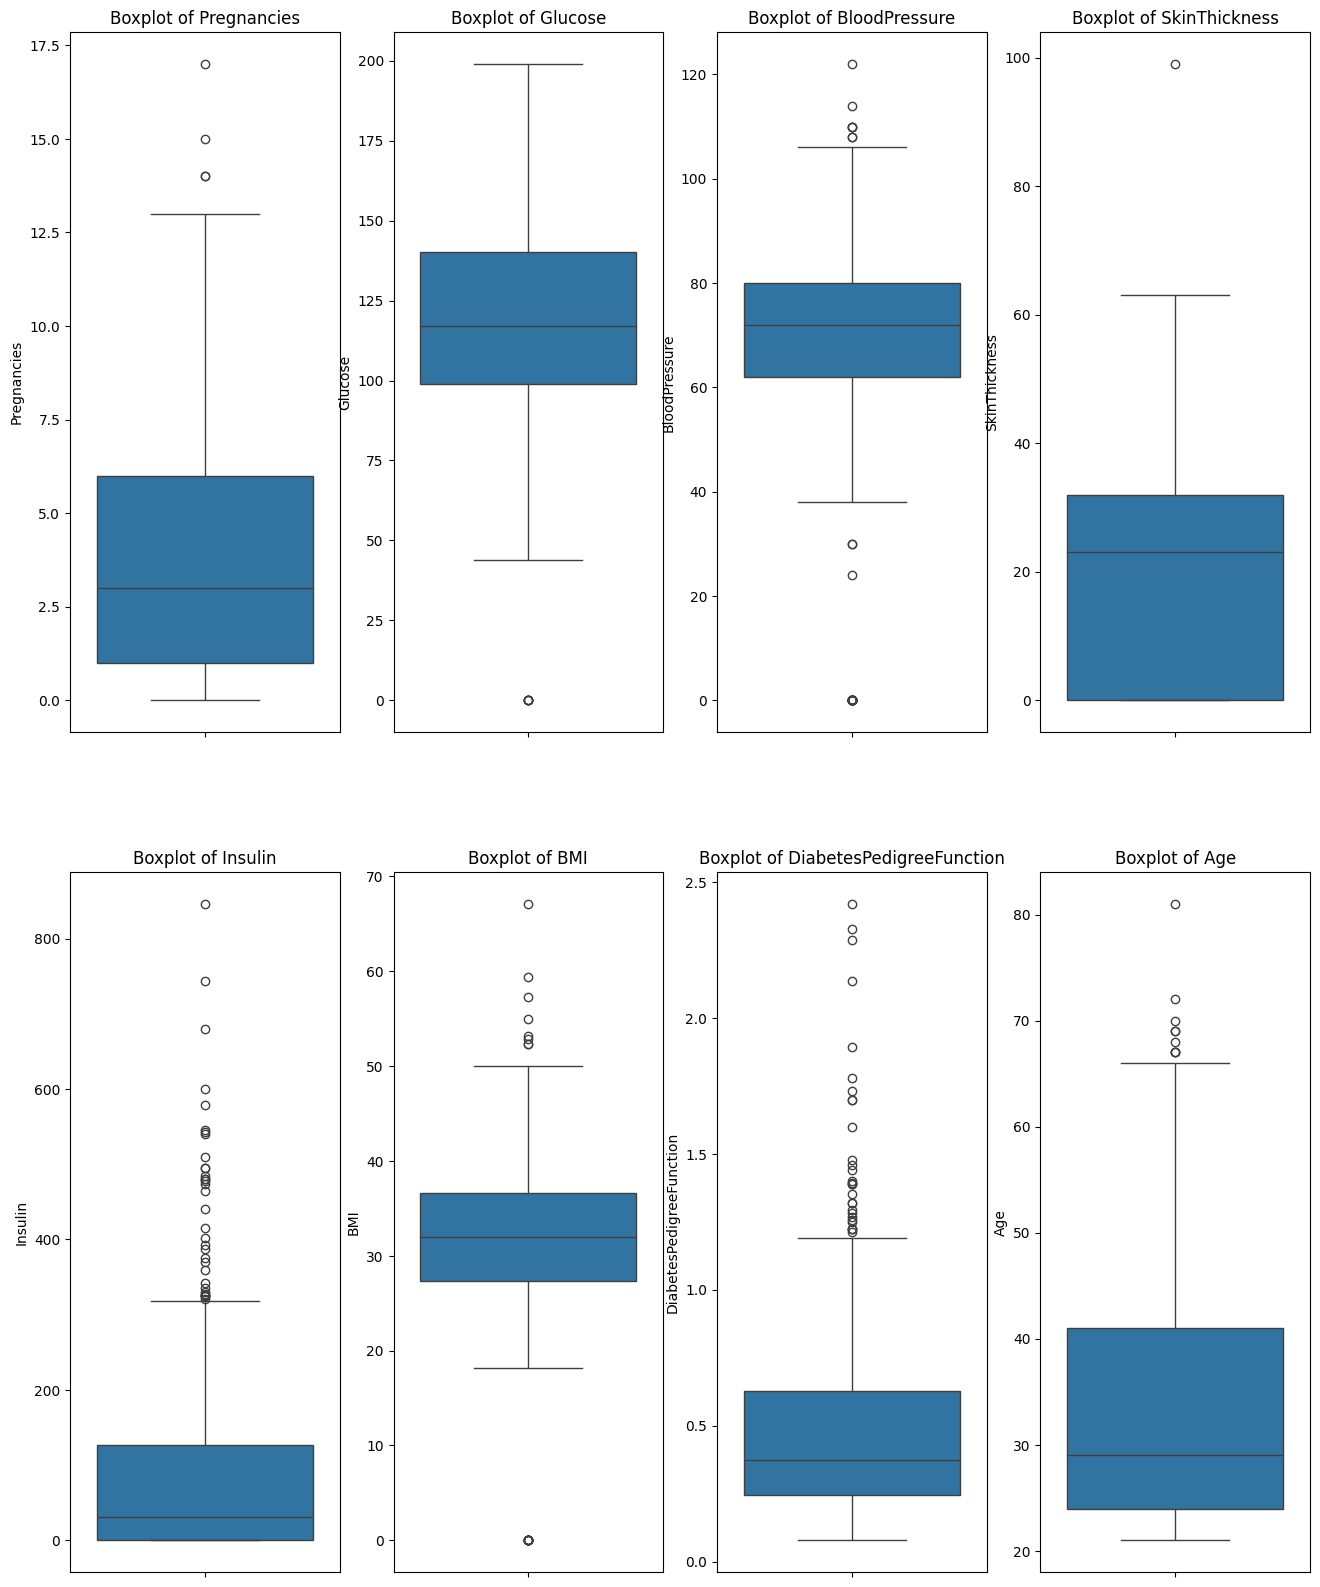

In [7]:
num_list = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

fig , axes = plt.subplots(nrows = 2 , ncols = 4, figsize=(16,20))
axes = axes.flatten() # Flatten to 1D array for easy iteration

for i , col in enumerate(num_list):
    sns.boxplot(data =df , y = col , ax = axes[i])
    axes[i].set_title(f'Boxplot of {col}')

- A few features — such as **Pregnancies**, **SkinThickness**, and **Age** — show relatively few outlier points, all extending in the positive direction beyond the upper whisker. These suggest natural right-skew rather than data errors.

- **Glucose** displays a small number of observations falling below the lower whisker — indicating mild negative outliers. These may represent measurement anomalies or rare physiological cases worth preserving.

- Features like **BloodPressure** and **BMI** contain a modest number of outliers on both ends — both negative (physiologically questionable, e.g., 0 values) and positive (extreme high values). These may reflect data entry issues or true clinical extremes.

- Two variables — **Insulin** and **DiabetesPedigreeFunction** — exhibit a large concentration of outlier points, especially on the upper end. These are not noise to be discarded, but likely meaningful signals — particularly in a medical context where extreme values can be clinically significant.

Rather than removing or replacing these outliers — which could erase important patterns or introduce bias — we will retain them in the dataset and apply **Robust Scaling** during preprocessing. This approach uses the median and interquartile range to rescale features, making them suitable for modeling while remaining insensitive to extreme values. It respects the integrity of the original data and ensures models are not disproportionately influenced by outliers.

## 📝 Data Quality Report

1. **Dataset Overview**

* **Records**: 768
* **Variables**: 9
* **Data Types**: 7 int, 2 float
* **Nulls**: None
* **Duplicates**: None
* **Memory Usage**: \~54 KB

---

2. **Variable-Level Summary**

| Variable                     | Range (Min–Max) | Mean ± Std   | Notes on Distribution                              | Outliers             |
| ---------------------------- | --------------- | ------------ | -------------------------------------------------- | -------------------- |
| **Pregnancies**              | 0 – 17          | 3.85 ± 3.37  | Right-skewed; spread almost as wide as mean        | High (≥12–17)        |
| **Glucose**                  | 0 – 199         | 120.9 ± 32.0 | Reasonable spread; skewed right                    | Low (0), High (>180) |
| **BloodPressure**            | 0 – 122         | 69.1 ± 19.4  | Wide spread; implausible 0 values                  | Low (0), High (>110) |
| **SkinThickness**            | 0 – 99          | 20.5 ± 16.0  | Many zeros (Q1=0); right-skewed                    | High (>70)           |
| **Insulin**                  | 0 – 846         | 79.8 ± 115.2 | Extremely skewed; most values very low or 0        | High (>300)          |
| **BMI**                      | 0 – 67.1        | 32.0 ± 7.9   | Typical adult BMI distribution; some invalid zeros | Low (0), High (>50)  |
| **DiabetesPedigreeFunction** | 0.078 – 2.42    | 0.47 ± 0.33  | Right-skewed; large variability                    | High (>2.0)          |
| **Age**                      | 21 – 81         | 33.2 ± 11.8  | Spread across adults; skewed toward younger ages   | High (>70)           |
| **Outcome**                  | 0 – 1           | 0.35 ± 0.48  | Binary variable; \~35% positive cases              | None (binary only)   |

---

3. **Cross-Cutting Observations**

* **Outliers**:

  * **Pregnancies, Insulin, Age** → extreme high values.
  * **BloodPressure, BMI, Glucose** → contain invalid low values (zeros).
  * **SkinThickness & Insulin** → heavy clustering at 0 (likely missing placeholders).
* **Distribution Skewness**: Several features are **right-skewed**, especially Insulin and DiabetesPedigreeFunction.
* **Fake Zeros**: Implausible biological values indicate hidden missingness in multiple columns (BloodPressure, SkinThickness, Insulin, BMI).

---


## ❌ Issues Identified

1. **Hidden Missing Data (Fake Zeros)**

   * Implausible zero values appear in:

     * BloodPressure
     * SkinThickness
     * Insulin
     * BMI

2. **Outliers**

   * Very high values in Pregnancies (≥12), Insulin (>300), and Age (>70).
   * Moderate outliers in Glucose, BloodPressure, and BMI.

3. **Skewed Distributions**

   * Strong right-skew in Insulin and DiabetesPedigreeFunction.
   * Skewness present in Pregnancies, SkinThickness, and Age.

4. **Biological Implausibility**

   * BloodPressure = 0 → not possible in living humans.
   * BMI = 0 → invalid.
   * SkinThickness = 0 → unmeasured, not biologically meaningful.
   * Insulin = 0 → rare outside measurement error or missingness.

---

## ✅ EDA

### ✅ Univariate Analysis

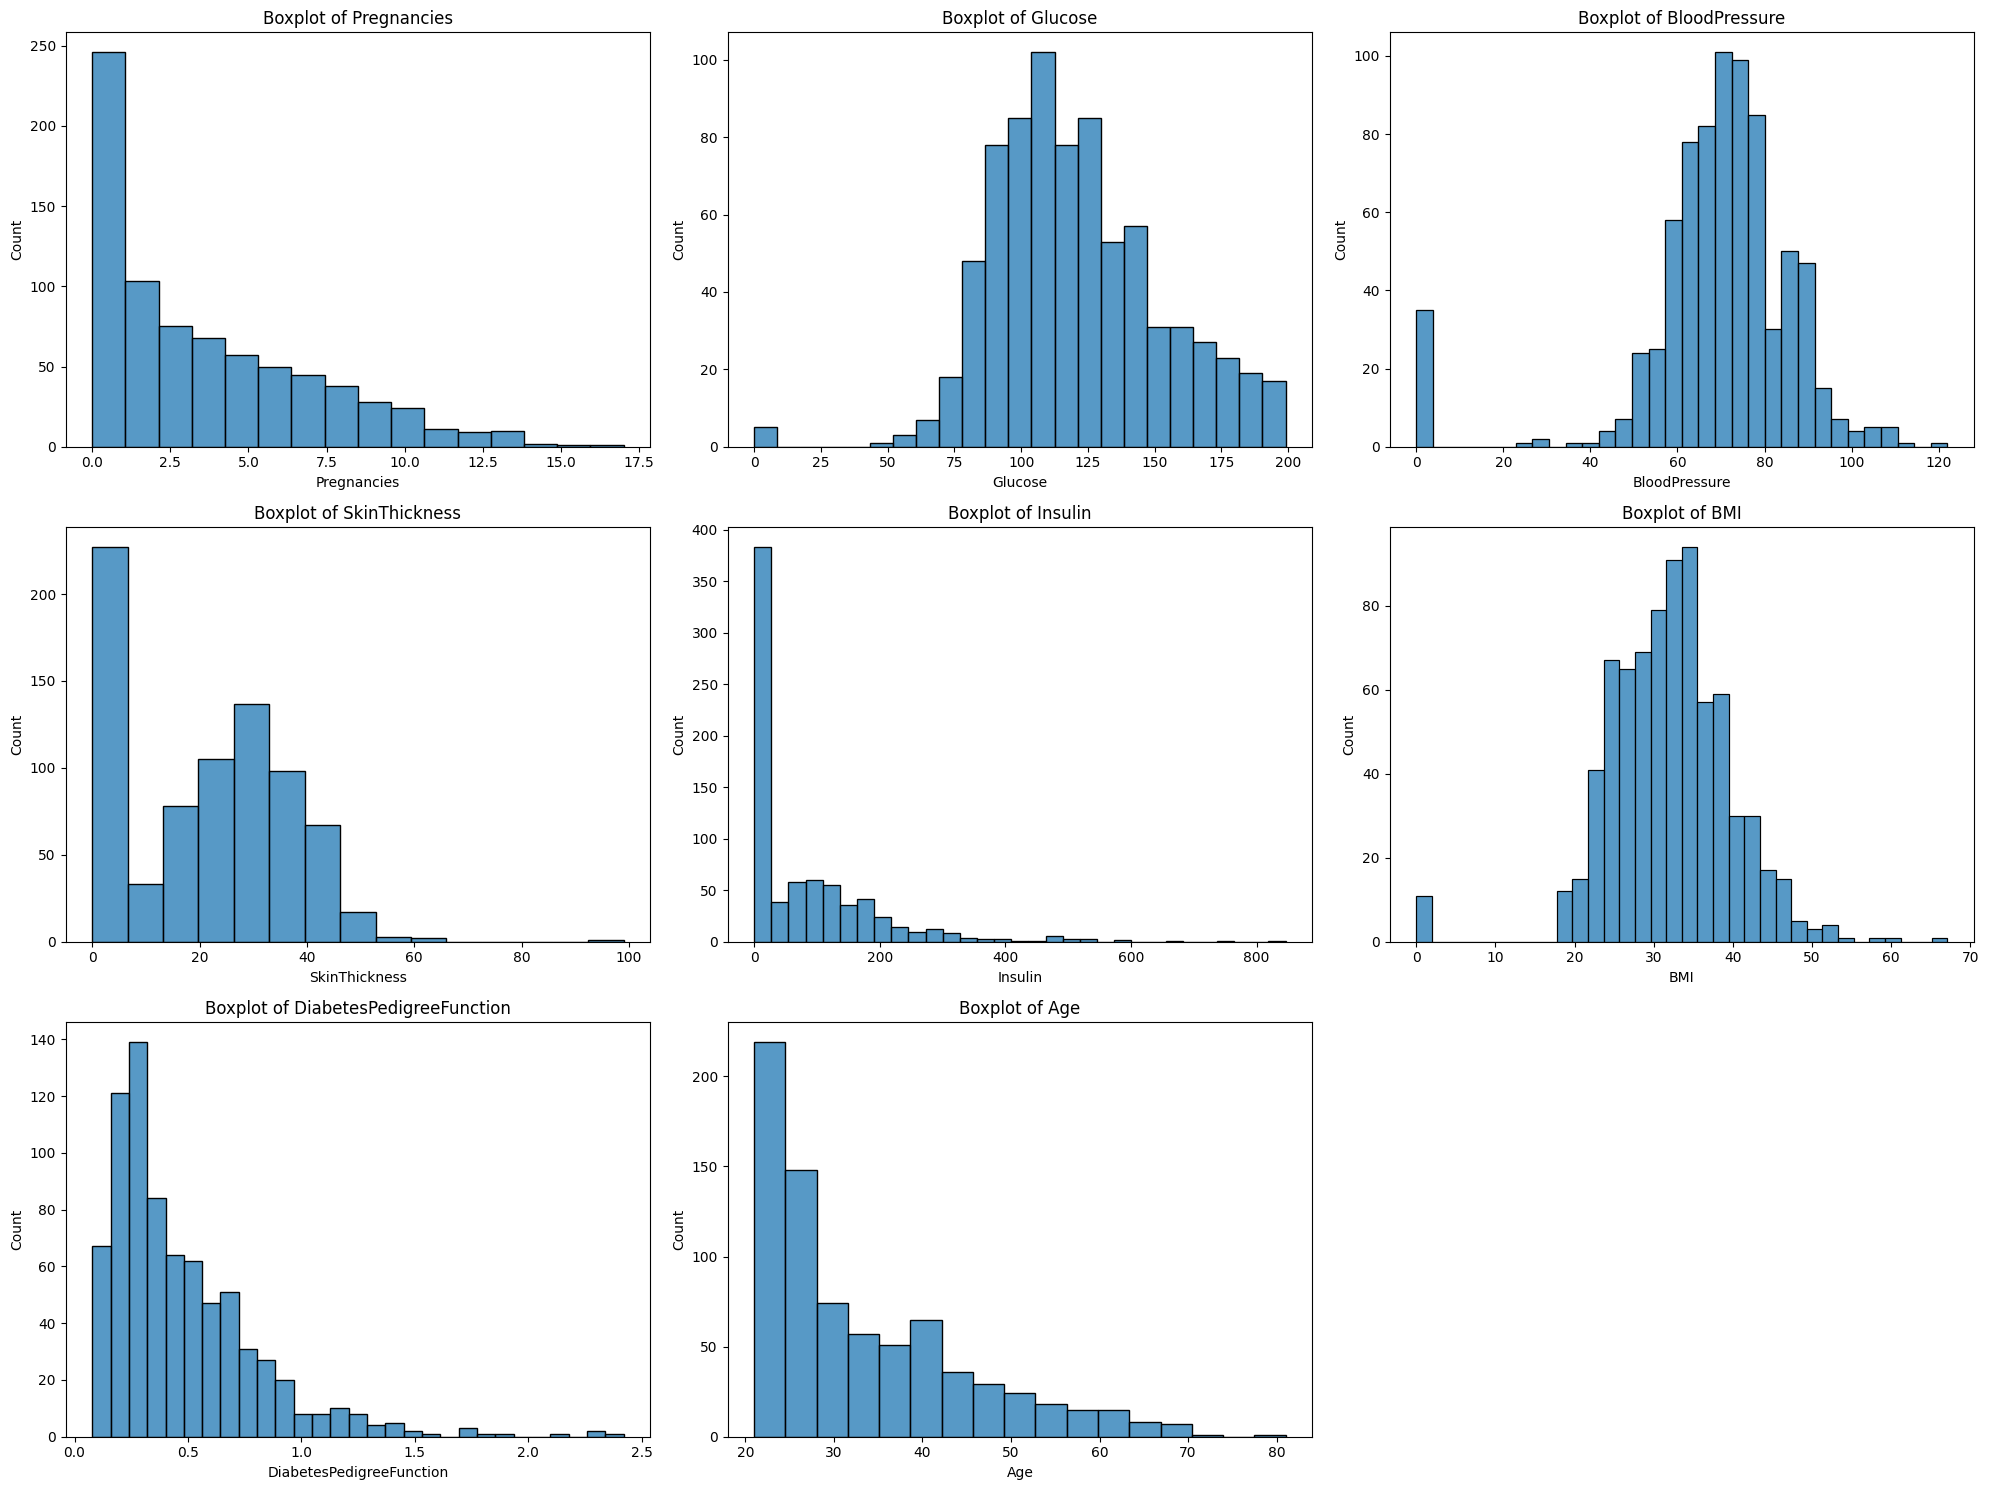

In [8]:
fig , axes = plt.subplots(nrows = 3 , ncols = 3, figsize=(20,15))
axes = axes.flatten() # Flatten to 1D array for easy iteration

for i , col in enumerate(num_list):
    sns.histplot(data =df , x = col , ax = axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Hide any unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The histograms reveal key patterns across the features:

- **Pregnancies**: Right-skewed, with most individuals having 0–3 pregnancies; few have more than 10.
- **Glucose**: Moderately skewed, centered around 100–125 mg/dL, with a long tail to higher values.
- **BloodPressure**: Bimodal-like shape, with a peak near 70 and another around 80 mmHg; many values at 0 (likely missing data).
- **SkinThickness**: Strong right skew, with a large concentration at low values and few high readings.
- **Insulin**: Highly skewed — majority of values are 0 or very low, with a few extreme outliers up to 846.
- **BMI**: Right-skewed, peaking around 30–35, with fewer very high or very low values.
- **DiabetesPedigreeFunction**: Right-skewed, concentrated between 0.1 and 1.0, with rare high values.
- **Age**: Right-skewed, mostly between 20–50 years, with fewer older individuals.

➡️ Key takeaway: Most variables show **right skewness**, and several (especially Insulin, BloodPressure, SkinThickness) have **many zero or near-zero values**, suggesting possible missing data or measurement issues. These patterns support using **robust scaling** and careful handling of zeros before modeling.

### ✅ Bivariate & Multivariate Analysis

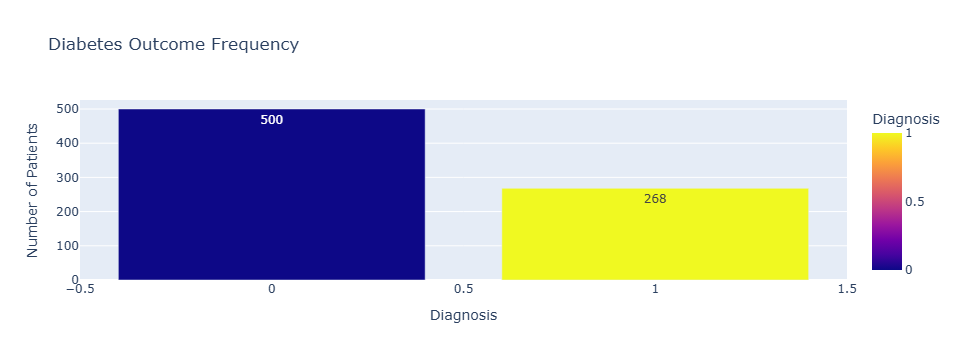

In [9]:
# How many patients have diabetes versus those who don’t?
# we show that by using bar plot 
fig = px.bar(df['Outcome'].value_counts().reset_index() ,
            x = 'Outcome',y='count' ,color="Outcome",
            text_auto=True,title="Diabetes Outcome Frequency",
            labels={'Outcome': 'Diagnosis', 'count': 'Number of Patients'}
            )
fig.show()

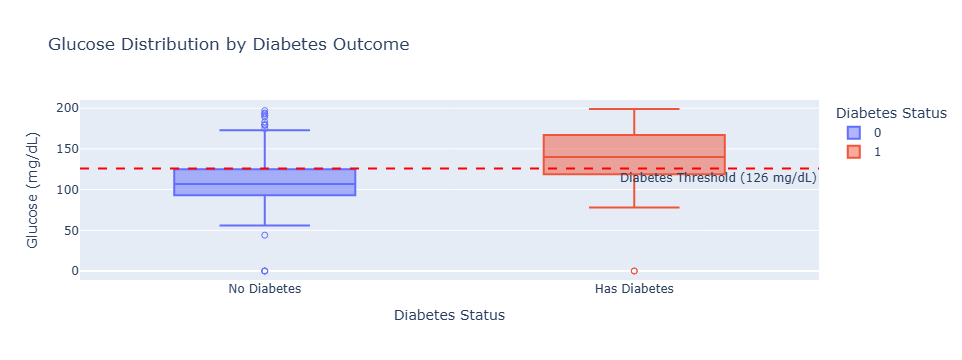

In [10]:
# What’s the relationship between glucose levels and the outcome?
# let's Scatter plot Glucose vs. Outcome

fig = px.box(df, x='Outcome', y='Glucose',
             color='Outcome',
             labels={'Outcome': 'Diabetes Status', 'Glucose': 'Glucose (mg/dL)'},
             title="Glucose Distribution by Diabetes Outcome",
             color_discrete_map={0: '#636EFA', 1: '#EF553B'},
             category_orders={'Outcome': [0, 1]},
             points='suspectedoutliers')  # Show only extreme outliers

fig.update_xaxes(tickvals=[0, 1], ticktext=['No Diabetes', 'Has Diabetes'])
fig.add_hline(y=126, line_dash="dash", line_color="red",
              annotation_text="Diabetes Threshold (126 mg/dL)",
              annotation_position="bottom right")
fig.show()

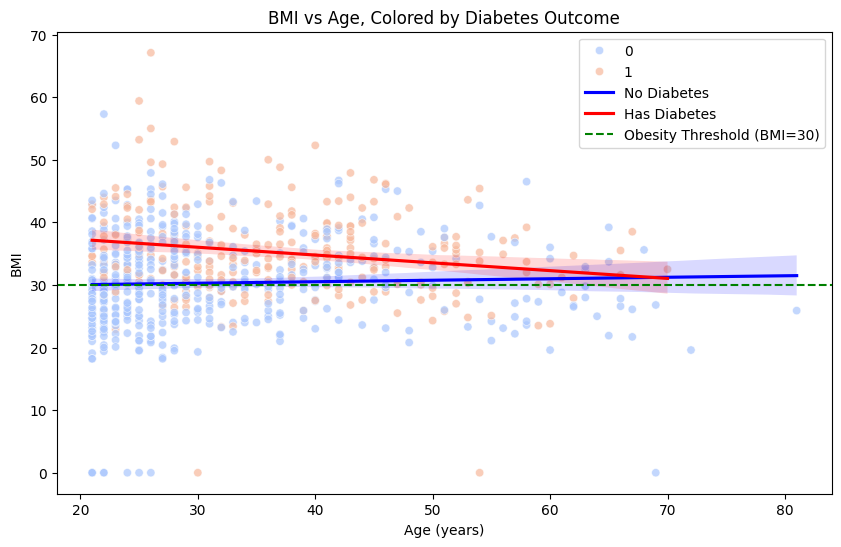

In [11]:
# Is BMI associated with diabetes risk, and does it interact with age?

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='BMI', hue='Outcome', palette='coolwarm', alpha=0.7)
sns.regplot(data=df[df['Outcome']==0], x='Age', y='BMI', scatter=False, color='blue', label='No Diabetes')
sns.regplot(data=df[df['Outcome']==1], x='Age', y='BMI', scatter=False, color='red', label='Has Diabetes')

plt.title('BMI vs Age, Colored by Diabetes Outcome')
plt.xlabel('Age (years)')
plt.ylabel('BMI')
plt.legend(title='Diabetes Status')
plt.axhline(y=30, color='green', linestyle='--', label='Obesity Threshold (BMI=30)')
plt.legend()
plt.show()

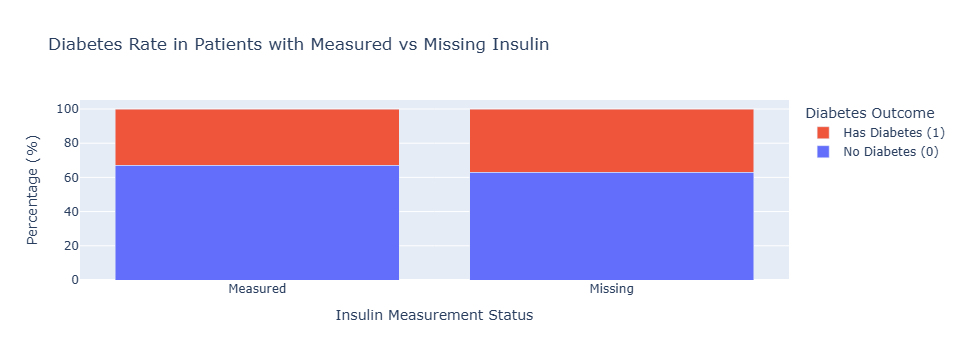

In [12]:
# Are patients with missing Insulin measurements more likely to be diabetic?

# Create missing flag
df['insulin_missing'] = (df['Insulin'] == 0).astype(int)

# Cross-tab
ct = pd.crosstab(df['insulin_missing'], df['Outcome'], normalize='index') * 100

fig = go.Figure(data=[
    go.Bar(name='No Diabetes (0)', x=['Measured', 'Missing'], y=ct[0], marker_color='#636EFA'),
    go.Bar(name='Has Diabetes (1)', x=['Measured', 'Missing'], y=ct[1], marker_color='#EF553B')
])

fig.update_layout(
    title="Diabetes Rate in Patients with Measured vs Missing Insulin",
    xaxis_title="Insulin Measurement Status",
    yaxis_title="Percentage (%)",
    barmode='stack',
    legend_title="Diabetes Outcome"
)
fig.show()

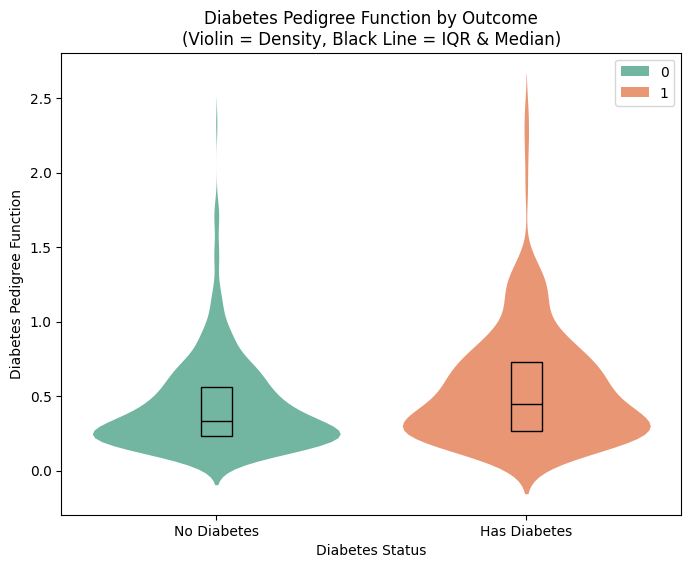

In [13]:
# How does Diabetes Pedigree Function relate to outcome, and is it skewed by outliers?
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Outcome', y='DiabetesPedigreeFunction', 
               hue='Outcome', palette='Set2', inner=None, linewidth=0)
sns.boxplot(data=df, x='Outcome', y='DiabetesPedigreeFunction', 
            width=0.1, color="black", showcaps=False, boxprops={'facecolor':'none'}, 
            showfliers=False, whiskerprops={'linewidth':0})

plt.title('Diabetes Pedigree Function by Outcome\n(Violin = Density, Black Line = IQR & Median)')
plt.xlabel('Diabetes Status')
plt.ylabel('Diabetes Pedigree Function')
plt.xticks([0, 1], ['No Diabetes', 'Has Diabetes'])
plt.show()

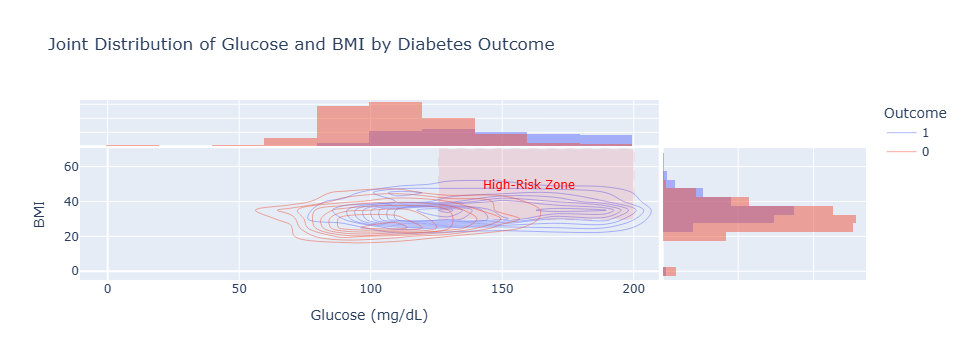

In [14]:
# What’s the joint effect of Glucose and BMI on diabetes risk?
fig = px.density_contour(
    df,
    x='Glucose',
    y='BMI',
    color='Outcome',
    marginal_x='histogram',
    marginal_y='histogram',
    title='Joint Distribution of Glucose and BMI by Diabetes Outcome',
    labels={'Glucose': 'Glucose (mg/dL)', 'BMI': 'BMI'}
)

# ✅ Apply update only to density_contour traces
fig.update_traces(
    contours_coloring="fill",
    contours_showlabels=True,
    selector=dict(type='contour')
)

fig.add_shape(
    type="rect",
    x0=126, y0=30, x1=200, y1=70,
    line=dict(color="Red", width=2, dash="dash"),
    fillcolor="red",
    opacity=0.1
)

fig.add_annotation(
    x=160, y=50,
    text="High-Risk Zone",
    showarrow=False,
    font=dict(color="red")
)

fig.show()


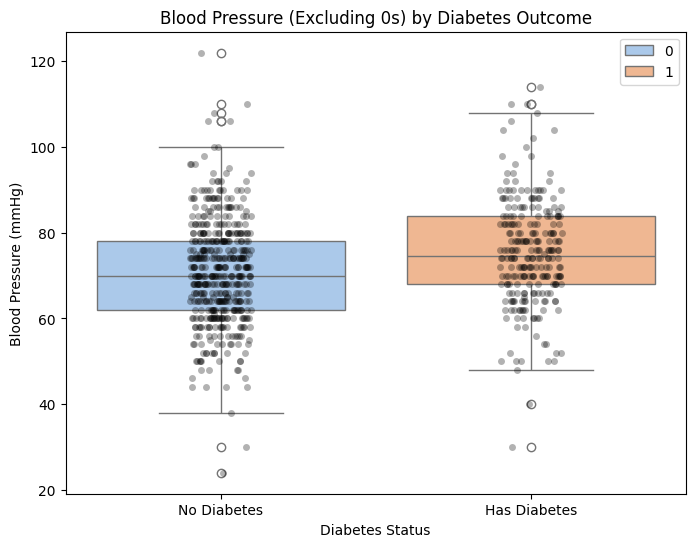

In [15]:
# Does BloodPressure show different behavior in diabetic patients, even after accounting for missing (0) values?
df_real_bp = df[df['BloodPressure'] > 0]  # Exclude fake zeros

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_real_bp, x='Outcome', y='BloodPressure', hue='Outcome', palette='pastel')
sns.stripplot(data=df_real_bp, x='Outcome', y='BloodPressure', color='black', alpha=0.3, jitter=True)

plt.title('Blood Pressure (Excluding 0s) by Diabetes Outcome')
plt.xlabel('Diabetes Status')
plt.ylabel('Blood Pressure (mmHg)')
plt.xticks([0, 1], ['No Diabetes', 'Has Diabetes'])
plt.show()

### ✅ Correlation Matrix 

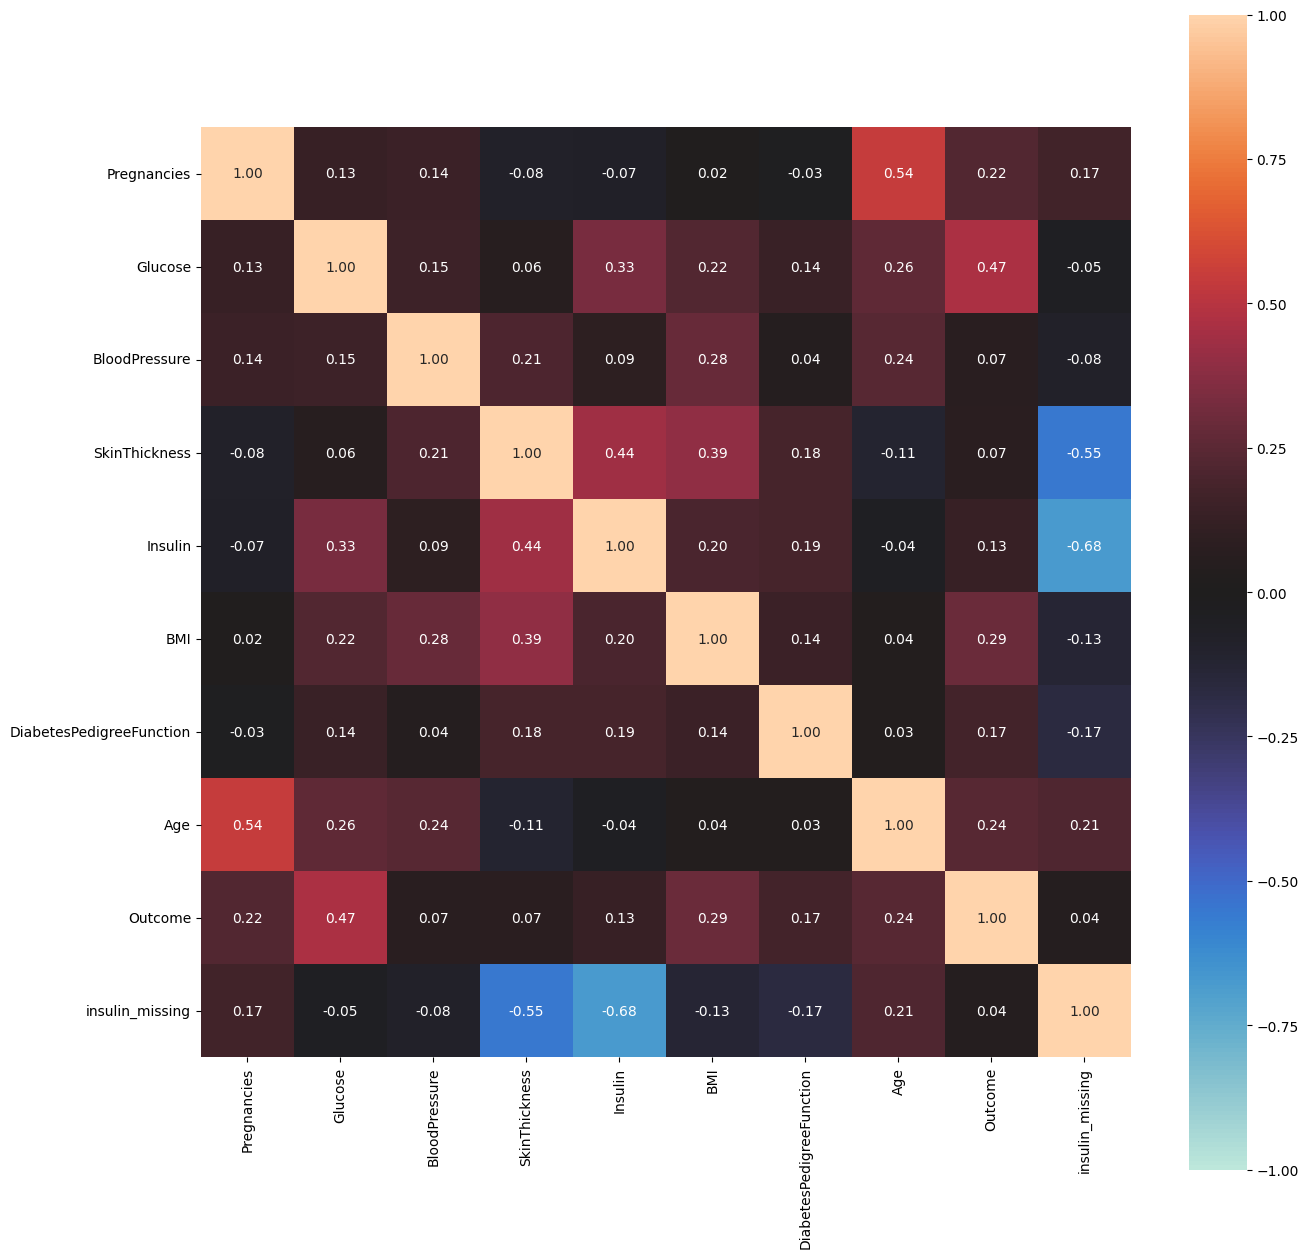

In [16]:
corr = associations(df)

In [17]:
corr['corr']['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
insulin_missing             0.040934
Name: Outcome, dtype: float64

### ✅ Key Findings

1. **Diabetes Outcome Frequency**  
   The dataset includes 500 patients without diabetes (diagnosis = 0) and 268 with diabetes (diagnosis = 1), indicating a higher proportion of non-diabetic individuals, which may influence model performance if not accounted for.

2. **Glucose Distribution by Diabetes Outcome**  
   Patients diagnosed with diabetes exhibit significantly higher glucose levels, with median values exceeding the clinical threshold of 126 mg/dL. The interquartile range is broader in diabetic patients, reflecting greater variability in glucose concentrations among those with the condition.

3. **Diabetes Rate in Patients with Measured vs Missing Insulin**  
   There is no substantial difference in diabetes prevalence between patients with measured insulin and those with missing insulin data. Both groups show comparable proportions of diabetic and non-diabetic cases, suggesting that missing insulin values do not introduce significant bias in outcome prediction.

4. **Joint Distribution of Glucose and BMI by Diabetes Outcome**  
   A high-risk zone emerges where elevated glucose and higher BMI overlap, particularly associated with diabetes (outcome = 1). This region shows a concentration of patients with both risk factors, highlighting their combined predictive power for diabetes diagnosis.

5. **BMI vs Age, Colored by Diabetes Outcome**  
   Older age correlates with higher BMI in both groups, but diabetic patients consistently have higher average BMIs across all age ranges. Most diabetic individuals exceed the obesity threshold (BMI = 30), reinforcing the strong link between obesity and diabetes risk.

6.  **Blood Pressure (Excluding 0s) by Diabetes Outcome**  
   Diabetic patients tend to have slightly higher blood pressure levels than non-diabetic individuals, though the distributions overlap considerably. The median blood pressure is marginally elevated in the diabetic group, indicating a modest but consistent association between hypertension and diabetes.

7. **Diabetes Pedigree Function by Outcome**  
   The violin plot reveals that individuals with diabetes have higher values of the Diabetes Pedigree Function compared to those without, with a broader distribution and higher median. This suggests a stronger genetic predisposition among diabetic patients, supporting the role of family history in diabetes development.

8. **Correlation with Diabetes Outcome**  
   Glucose has the strongest positive correlation with diabetes outcome (r = 0.467), followed by BMI (r = 0.293), Age (r = 0.238), Pregnancies (r = 0.222), and Diabetes Pedigree Function (r = 0.174). Insulin and SkinThickness show weaker correlations, while BloodPressure and insulin_missing have minimal association (r < 0.1). These results confirm glucose as the most predictive feature, with family history and body composition playing secondary roles.

---

**Summary Insights:**  
- Glucose is the strongest predictor of diabetes status, followed by BMI and age.
- Genetic predisposition (Diabetes Pedigree Function) and obesity are key contributing factors.
- While blood pressure is moderately elevated in diabetics, it shows less discriminative power.
- Missing insulin data does not appear to skew diabetes diagnosis rates significantly.
- The combination of high glucose and high BMI defines a high-risk population, emphasizing the importance of metabolic health monitoring.

## ✅ Data Preprocessing and Preperation

### ✅ Preprocessing

#### ✅ X , Y

In [18]:
x = df.drop(columns=['Outcome']).copy()
y = df['Outcome'].copy()

#### ✅ Scaling

In [19]:
scaler = RobustScaler()
x_scaled = scaler.fit_transform(x)

### ✅ Preparing Data

#### ✅ SMOTE

In [20]:
smote = SMOTE(sampling_strategy={1: 500}, random_state=42)
x_scaled_sm , y_sm = smote.fit_resample(x_scaled,y)

#### ✅ Train and Test 

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.10,random_state=42,stratify=y)

sm_x_train, sm_x_test, sm_y_train, sm_y_test = train_test_split(x_scaled_sm,y_sm,test_size=0.10,random_state=42,stratify=y_sm)

## ✅ Model Training

### ✅ Models List

In [22]:
models = [
    ('LR',LogisticRegression()),
    ("RF",RandomForestClassifier()),
    ('SVM',SVC()),
    ("LSVM",LinearSVC()),
    ("KNN",KNeighborsClassifier()),
    ('CART',DecisionTreeClassifier()),
    ("ETree",ExtraTreeClassifier())
]

### ✅ Training Loop

In [23]:
for model in models:
    print(f"===== Train With {model[0]} =====")
    print(f"---->| Before SMOTE |<----")
    res = cross_validate(model[1] , x_scaled , y , scoring='accuracy',return_train_score=True )
    print("Train Accuracy:", res['train_score'].mean())
    print("Test Accuracy:", res['test_score'].mean())
    print("_"*33)
    print(f"---->| After SMOTE |<----")
    res = cross_validate(model[1] , x_scaled_sm , y_sm , scoring='accuracy',return_train_score=True )
    print("Train Accuracy:", res['train_score'].mean())
    print("Test Accuracy:", res['test_score'].mean())
    print("_"*33)
    print('#'*33)
    print("_"*33)

===== Train With LR =====
---->| Before SMOTE |<----
Train Accuracy: 0.7757178040835784
Test Accuracy: 0.7643748408454292
_________________________________
---->| After SMOTE |<----
Train Accuracy: 0.75725
Test Accuracy: 0.7549999999999999
_________________________________
#################################
_________________________________
===== Train With RF =====
---->| Before SMOTE |<----
Train Accuracy: 1.0
Test Accuracy: 0.7591630591630592
_________________________________
---->| After SMOTE |<----
Train Accuracy: 1.0
Test Accuracy: 0.8210000000000001
_________________________________
#################################
_________________________________
===== Train With SVM =====
---->| Before SMOTE |<----
Train Accuracy: 0.819338470909139
Test Accuracy: 0.7721840251252017
_________________________________
---->| After SMOTE |<----
Train Accuracy: 0.83375
Test Accuracy: 0.794
_________________________________
#################################
_________________________________
===== 

## ✅ Model Tuning and Evaluation
**SVC and RF**

### ✅ Tuning Function

In [24]:
model_results= {}
def tuning(model, model_name, X_train, y_train, X_test, y_test):
    # Train & predict
    model.fit(X_train, y_train)
    y_pred_train, y_pred_test = model.predict(X_train), model.predict(X_test)

    # Helper to compute metrics
    def scores(y_true, y_pred, proba):
        return {
            'accuracy': accuracy_score(y_true, y_pred),
            'precision': precision_score(y_true, y_pred),
            'recall': recall_score(y_true, y_pred),
            'f1': f1_score(y_true, y_pred),
            'auc': roc_auc_score(y_true, proba)
        }

    # Calculate results
    results = {
        'train': scores(y_train, y_pred_train, model.predict_proba(X_train)[:, 1]),
        'test': scores(y_test, y_pred_test, model.predict_proba(X_test)[:, 1])
    }
    model_results[model_name] = results

    # Print results
    print(f"\n=== {model_name} Results (with SMOTE) ===")
    for split, res in results.items():
        print(f"\n{split.capitalize()} Scores:")
        for m, v in res.items():
            print(f" {m.capitalize()}: {v:.4f}")

    # Overfitting gaps
    print("\nOverfitting Gaps (Train - Test):")
    for m in results['train']:
        gap = results['train'][m] - results['test'][m]
        print(f" {m.capitalize()} Gap: {gap:.4f}")
    print(" Note: High accuracy gap (>0.1) suggests potential overfitting."
          if results['train']['accuracy'] - results['test']['accuracy'] > 0.1
          else " Note: Low gap indicates good generalization.")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)
    ConfusionMatrixDisplay(cm, display_labels=['No Diabetes', 'Diabetes']).plot(cmap=plt.cm.Blues)
    plt.title(f'{model_name} - Confusion Matrix (Test Set, with SMOTE)')
    plt.show()

    return rf.best_estimator_

### ✅ Tuning with Random Forest


=== Random Forest Results (with SMOTE) ===

Train Scores:
 Accuracy: 0.8122
 Precision: 0.7970
 Recall: 0.8378
 F1: 0.8169
 Auc: 0.8874

Test Scores:
 Accuracy: 0.8600
 Precision: 0.8333
 Recall: 0.9000
 F1: 0.8654
 Auc: 0.9024

Overfitting Gaps (Train - Test):
 Accuracy Gap: -0.0478
 Precision Gap: -0.0363
 Recall Gap: -0.0622
 F1 Gap: -0.0485
 Auc Gap: -0.0150
 Note: Low gap indicates good generalization.


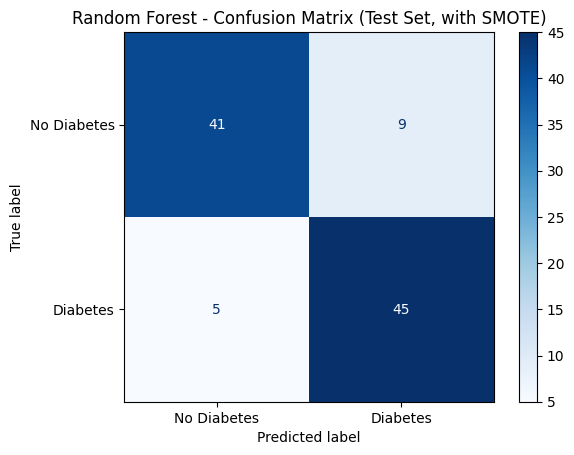

CPU times: total: 20.8 s
Wall time: 20.9 s


In [25]:
%%time
rf_param = {'n_estimators': [50, 100], 'max_depth': [2, 3],
            'min_samples_split': [5, 10], 'min_samples_leaf': [1, 2],
            'max_features': ['sqrt', 0.5]} 

rf = GridSearchCV(RandomForestClassifier(random_state=42),rf_param,scoring='accuracy',cv=5,return_train_score=True)

rf_best = tuning(model=rf,model_name="Random Forest",X_train=sm_x_train,X_test=sm_x_test,y_train=sm_y_train,y_test=sm_y_test)

### ✅ Tuning with SVC 


=== SVM Results (with SMOTE) ===

Train Scores:
 Accuracy: 0.9033
 Precision: 0.8954
 Recall: 0.9133
 F1: 0.9043
 Auc: 0.9457

Test Scores:
 Accuracy: 0.8400
 Precision: 0.8400
 Recall: 0.8400
 F1: 0.8400
 Auc: 0.8656

Overfitting Gaps (Train - Test):
 Accuracy Gap: 0.0633
 Precision Gap: 0.0554
 Recall Gap: 0.0733
 F1 Gap: 0.0643
 Auc Gap: 0.0801
 Note: Low gap indicates good generalization.


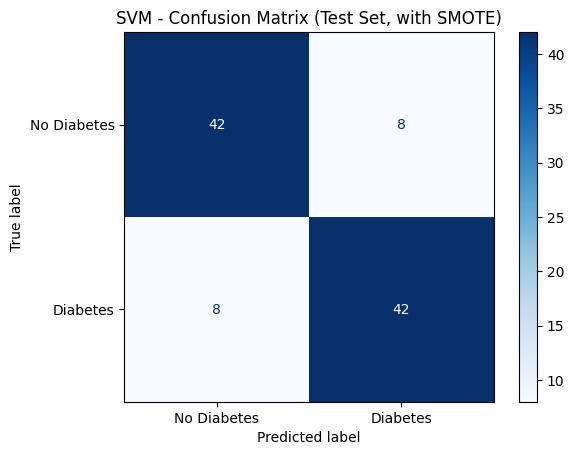

CPU times: total: 8.08 s
Wall time: 8.1 s


In [26]:
%%time 
svc_param = {'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}

svc = GridSearchCV(SVC(random_state=42,probability=True),svc_param,scoring='accuracy',cv=5,return_train_score=True)

svc_best = tuning(model=svc,model_name="SVM",X_train=sm_x_train,X_test=sm_x_test,y_train=sm_y_train,y_test=sm_y_test)

### ✅ Model comparison
**SVM (with SMOTE)**

* **Train:** Very strong (Accuracy 0.90, AUC 0.95).
* **Test:** Decent (Accuracy 0.84, AUC 0.87).
* **Gap:** Noticeable drop from train → test, meaning **some overfitting**.

**Random Forest (with SMOTE)**

* **Train:** Lower than SVM (Accuracy 0.81, AUC 0.89).
* **Test:** **Better than SVM** (Accuracy 0.86, AUC 0.90).
* **Gap:** Negative gaps (model performs *better on test than train*) → indicates **excellent generalization**.

---

✅ **Best Choice: Random Forest**

* Higher **test performance** (Accuracy, Recall, F1, AUC).
* **No overfitting** (actually generalizes better).
* More **robust and stable** for unseen data.

## ✅ Tain and Save best Model

### ✅ Train

In [27]:
rf_best.fit(x_scaled_sm,y_sm)

RandomForestClassifier(max_depth=3, min_samples_split=10, random_state=42)

### ✅ Save

In [28]:
import joblib
joblib.dump(rf_best,'Random Forest Classifier.pkl')

['Random Forest Classifier.pkl']